# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычисление значения функции потерь при помощи X, y и w
        return np.sum(np.square(X @ w - y)) / len(y)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычисление значения вектора градиента при помощи X, y и w
        return 2 * X.T @ (X @ w - y) / len(y)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = [np.copy(w_init)] # массив результата. Копируем значение, чтобы не менять объект 
    for i in range(n_iterations):
        w.append(w[-1] - lr * loss.calc_grad(X,y,w[-1])) # шаг итерации. Для простоты сделали подстановку прошлого значения "на месте"
    
    return w 


Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, ax=plt):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    # plt.figure(figsize=(15, 6))
    # ax.set_title("GD trajectory")
    ax.set_xlabel(r"$w_1$")
    ax.set_ylabel(r"$w_2$")
    ax.set_xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    ax.set_ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = ax.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    plt.sca(ax)
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    ax.scatter(w_list[:, 0], w_list[:, 1])
    ax.plot(w_list[:, 0], w_list[:, 1])


**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

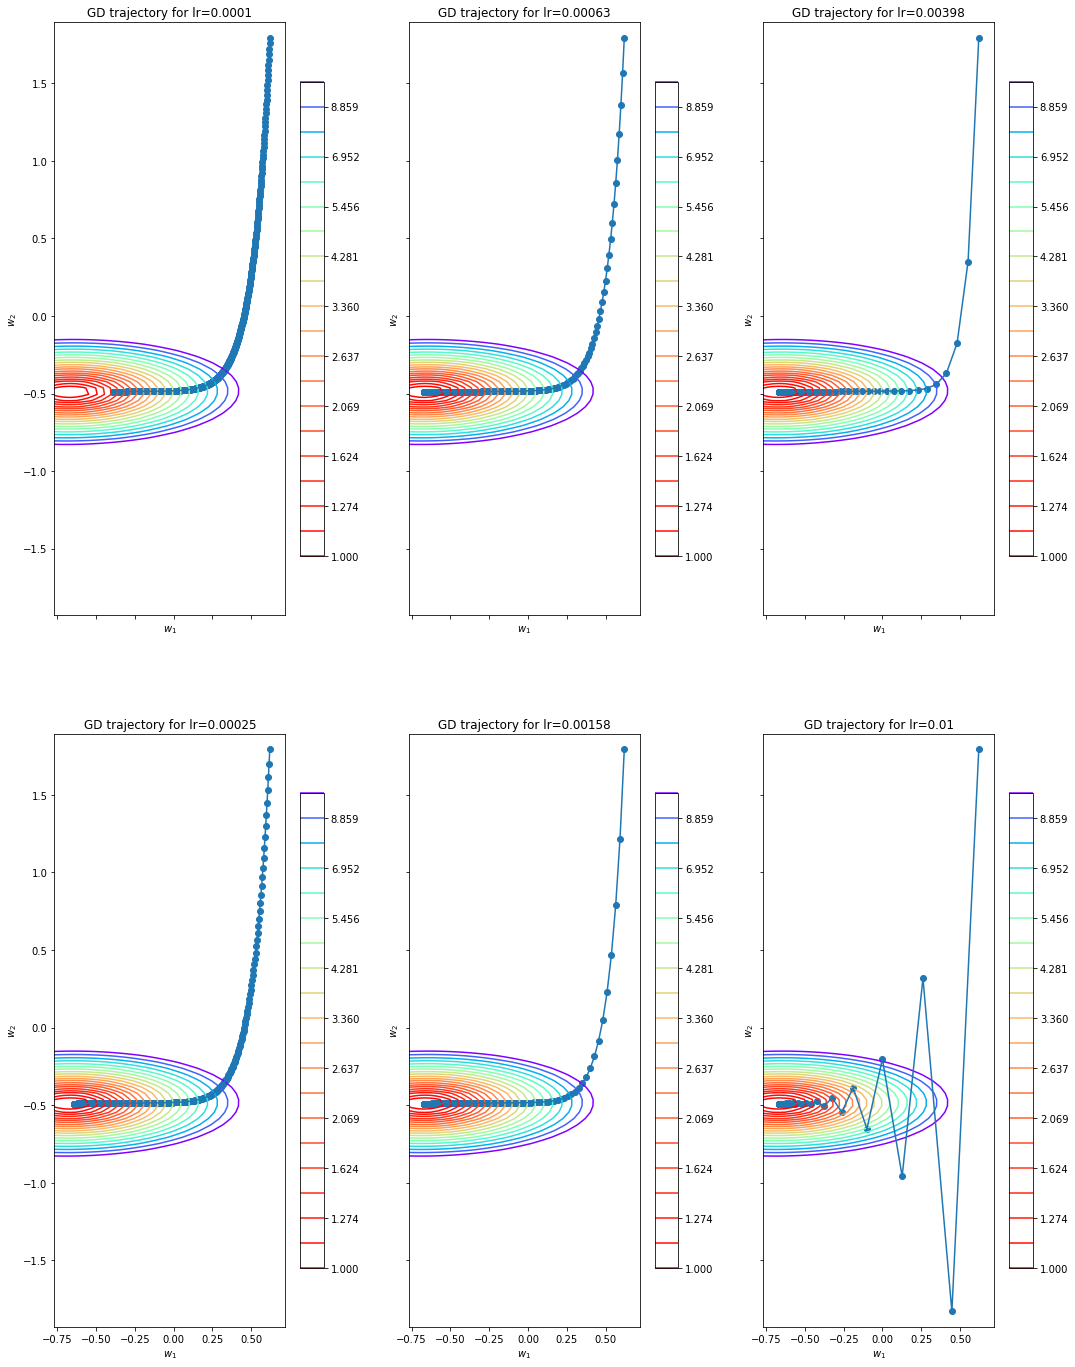

In [9]:
lrs = np.logspace(-4, -2, 6) # логарифмически выбреем значения шага
# я переписал функцию, чтобы она принимала оси для рисования
f, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(6 * 3, 12 * 2))
for i, lr in enumerate(lrs):
    w_list = gradient_descent(w_init, X, y, loss, lr, 1000)
    ax[i % 2][i//2].set_title(f"GD trajectory for lr={round(lr, 5)}")
    plot_gd(w_list, X, y, loss, ax[i % 2][i//2]) 

Как можно увидеть, параметр $lr$ влияет на скорость градиентного спуска. Чем он меньше - тем меньше шаги. Причем при большой скорости шаги делаются настолько резкие, что веса часто перескакивают желаемое минимальное значение. При попытке выставить параметр $lr > 0.01$ значения часто вылетали из градиентной ямы, так как шаг был очень большой. При этом маленький шаг тоже не всегда подходит - минимум может достигаться очень долго. Например при скорости $lr = 0.0001$ за 1000 шагов градиентный спуск приблизился к минимуму не так хорошо, как при больших значениях данного параметра, так как двигался очень медленно.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = [np.copy(w_init)]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w.append(w[-1] - lr * loss.calc_grad(X[batch_indices], y[batch_indices], w[-1]))
    return w 

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

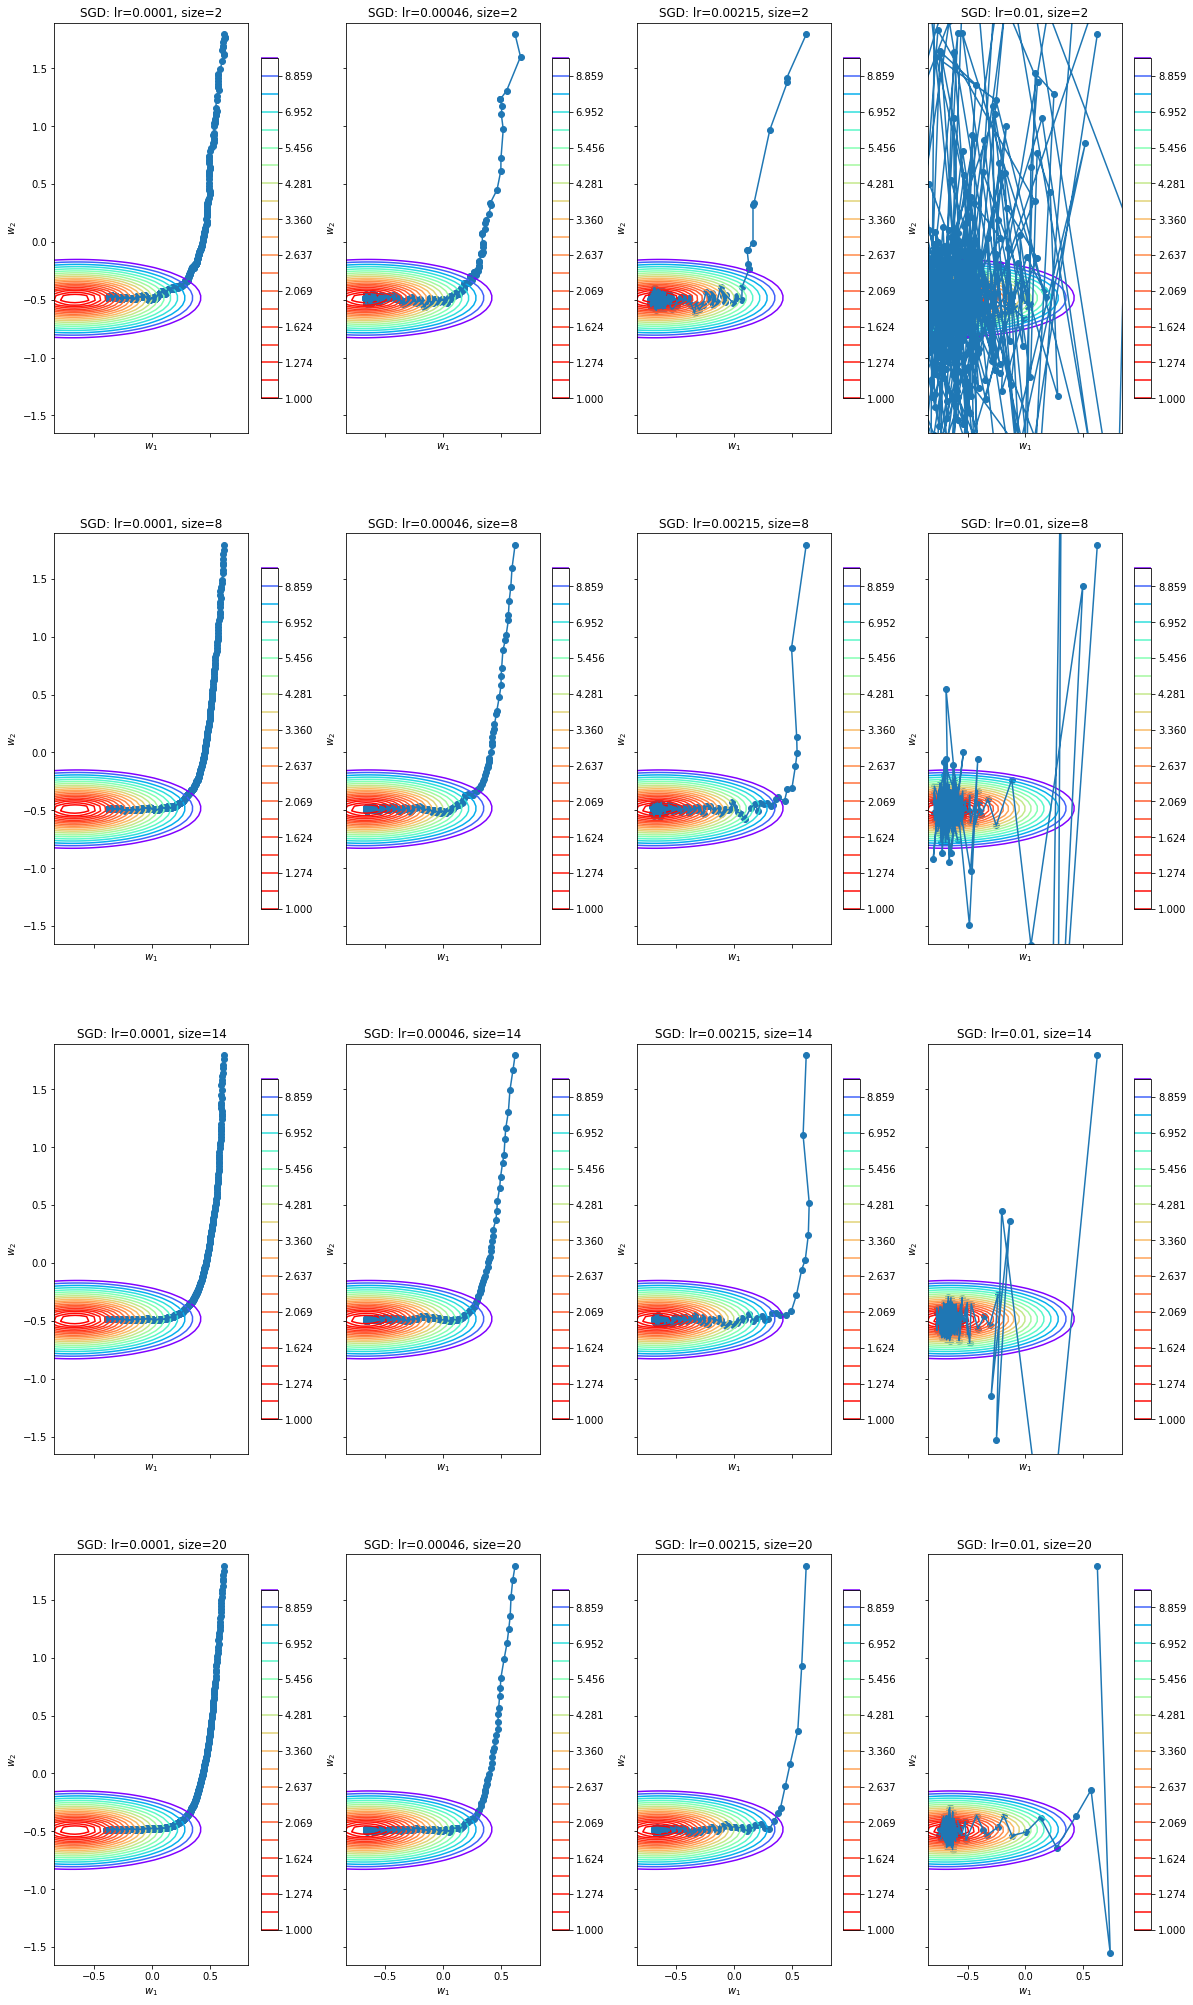

In [11]:
bs = np.linspace(2, 20, 4, dtype=int)
lrs = np.logspace(-4, -2, 4) # логарифмически выбреем значения шага

f, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(5 * 4, 9 * 4))
for i, size in enumerate(bs):
    for j, lr in enumerate(lrs):
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, size)
        ax[i][j].set_title(f"SGD: lr={round(lr, 5)}, size={size}")
        plot_gd(w_list, X, y, loss, ax[i][j]) 

Параметр `batch_size` (в подписи графиков `size`) при увеличении до размера первой оси массива $X$ приближается к значению обычного градиентного спуска, так как берет все больше и больше объектов из исходной выборки для одной итерации, так что скорость выполнения задачи растет с ростом `batch_size`. Но в то же время матричное произведение считается быстрее для массива меньшего размера, так что небольшое значение `batch_size` может привести к улучшению производительности градиентного спуска. Тем не менее, при небольших значениях `batch_size` градиентный спуск слишком часто меняет свое направление из-за того, что меньшее число элементов выборки дает меньшее представление о наклоне градиента, что и делает скачки очень непредсказуемыми. Если объединить этот эффект с большими шагами при $lr>0.001$, то стохастический градиентный спуск так и не сможет приблизиться к минимуму, как это произошло в случае `batch_size=2, lr=0.01`.

Так что значения `lr`, по прошлому анализу, следует брать небольшими, что понижает производительность, но в то же время она улучшается за счет `batch_size` так как мы берем не всю обучающую выборку. Таким образом, при правильном подборе параметров, метод стохастического градиентного спуска более оптимален, чем обычный градиентный спуск. 

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = [np.copy(w_init)]
    for i in range(n_iterations):
        eta = lr / (1 + i) ** p
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        w.append(w[-1] - eta * loss.calc_grad(X[batch_indices], y[batch_indices], w[-1]))
    return w 

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

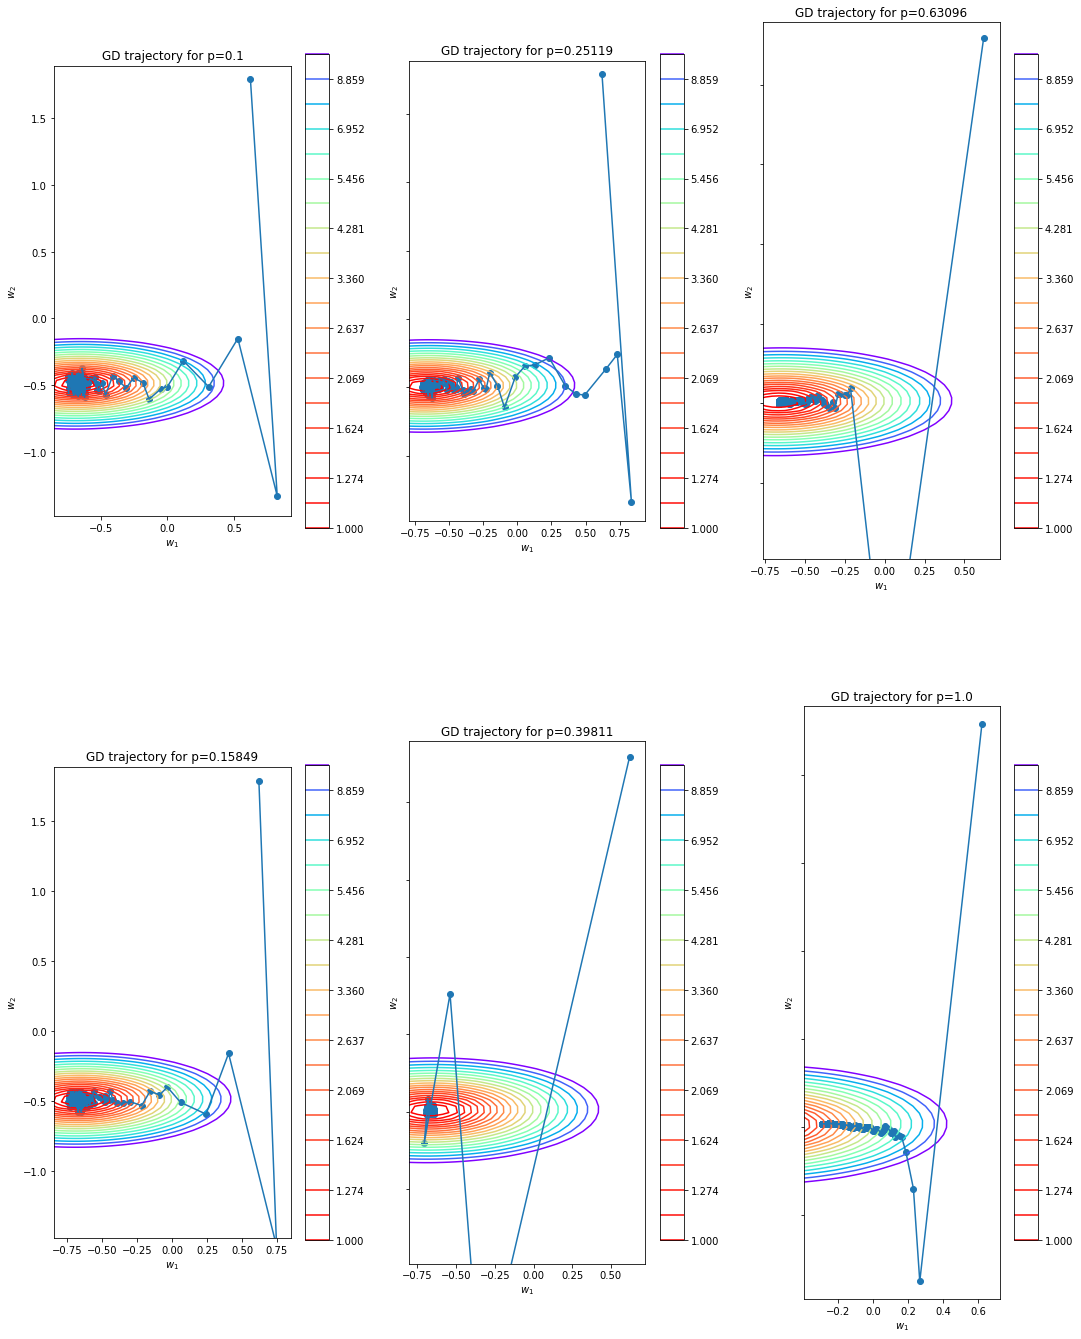

In [14]:
ps = np.logspace(-1, 0, 6)

f, ax = plt.subplots(2, 3, sharey=True, figsize=(6 * 3, 12 * 2))

for i, p in enumerate(ps):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 1000)
    ax[i % 2][i//2].set_title(f"GD trajectory for p={round(p, 5)}")
    plot_gd(w_list, X, y, loss, ax[i % 2][i//2]) 

При увеличении параметра `p` шаги затухают быстрее с каждой итерацией, так что пропадает проблема связанная с бесконечными перескоками, которая была при маленьком значении `batch_size` и большом значении скорости `lr`. Все же при достаточно больших `p` градиентный спуск может добраться до минимума хуже, как видно на последнем графике, где длина шага упала очень быстро и модель показала худший результат из представленных.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

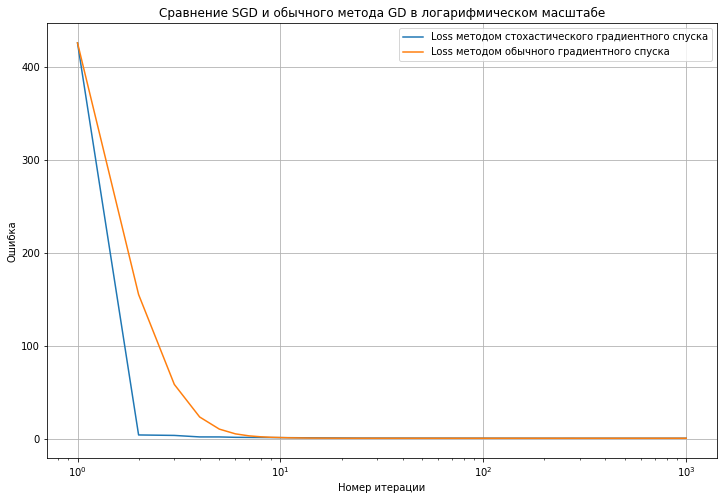

In [18]:
lr = 0.01
size = 10
p = 0.5
iter = 1000
w_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr, size, p, iter )
w_gd = gradient_descent(w_init, X, y, loss, lr, iter)
loss_sgd = []
loss_gd = []
for i in range(iter):
    loss_sgd.append(loss.calc_loss(X, y, w_sgd[i]))
    loss_gd.append(loss.calc_loss(X, y, w_gd[i]))

x = np.arange(1, iter+1)

plt.subplots(figsize=(12, 8))
plt.plot(x, loss_sgd, label="Loss методом стохастического градиентного спуска")
plt.plot(x, loss_gd,  label="Loss методом обычного градиентного спуска")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("Номер итерации")
plt.ylabel("Ошибка")
plt.title("Сравнение SGD и обычного метода GD в логарифмическом масштабе")
plt.show()

Видно, что число итераций, которое необходимо для достижения одинаковой точности, приблизительно совпадает в двух методах. Стохастический градиентный спуск оказался чуть лучше, так как он может делать более аккуратные шаги за счет уменьшения параметра `lr` с числом итераций, но это не является основным преимуществом. 

Главным отличием является не число итераций, а количество вычислений на одной итерации, поскольку SGD производит спуск не по всей обучающей выборке, а лишь по случайно выбранной на каждой итерации часть. В нашем случае мы брали 10 элементов на каждом шаге из 300, так что одна итерации была приблизительно в 30 раз быстрее. С учетом того, что SGD потребовалось приблизительно такое же число итераций, вычисления с ним пройдут гораздо быстрее. Это делает метод SGD более оптимальным, но в то же время требует более детального подбора гиперпараметров (того же `batch_size` или `p`). 

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [47]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1, iter: int = 10000) -> None:
        self.loss = loss
        self.lr = lr
        self.iter = iter # у крутой модели есть крутые настройки числа итераций 😎

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        w_init = np.random.uniform(-1, 1, (X.shape[1],)) # инициализировали веса случайным образом
        w_fit = gradient_descent(w_init, X, y, self.loss, self.lr, self.iter) # градиентный спуск 
        self.w = w_fit[-1] # берем последнее значение весов 
        self.err = loss.calc_loss(X, y, self.w) # сохраняем ошибку на тренировочной выборке, чтобы потом быстро её получить
        
        # дальше код не относится к заданию. Нужен только для анализа ошибки модели
        self.err_mid = loss.calc_loss(X, y, w_fit[len(w_fit) // 2]) # ошибка на половине итераций. Можно будет понять, был ли у модели какой-то прогресс
        self.err_init = loss.calc_loss(X, y, w_fit[0]) # аналогично, ошибка в самом начале
        self.w_mid = w_fit[len(w_fit) // 2] # сохраню, в случае, если мой loss выдает ошибку по другой метрике и мне надо будет считать самому 
        self.w_init = w_init # аналогично, для подсчета стартовой ошибки по другой метрике
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X @ self.w 

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [103]:
linear_regression = LinearRegression(MSELoss(), 0.01)

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [104]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [105]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_raw.isna().any().any() # True - есть пропуски 
X_raw.interpolate("backfill", inplace=True) # nan были в начале, так что заполняем движением назад 
X_raw.isna().any().any() # False - теперь пропусков нет, все ок 
X_raw.drop("index", axis=1, inplace=True) # убираем колонку с индексом 
numeric = X_raw.select_dtypes(include=np.number).columns.tolist() # численные признаки
categorial = set(X_raw.columns) - set(numeric) # категориальные признаки 
X = np.array(pd.get_dummies(X_raw, categorial)) # one-hot-encoding

y.isna().any() # False - все ок с целевой переменной 
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [107]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [108]:
from sklearn.metrics import mean_squared_error


print("Ошибка в начале\t\t\t", round(linear_regression.err_init))
print("Ошибка в середине\t\t", round(linear_regression.err_mid, 3))
print("Ошибка в конце (sklearn's MSE)\t", \
      round(mean_squared_error(y_train, linear_regression.predict(X_train)), 3)
    )
# sanity check: мой метод для подсчета ошибки должен давать такой же результат, что и метод sklearn выше 
print("Ошибка в конце (мой MSE)\t", round(linear_regression.err, 3)) # 🥳 ура, они совпадают 🎉

print("Ошибка на тесте\t\t\t", round(mean_squared_error(y_test, linear_regression.predict(X_test))))

# функция логирования ошибки на будущее 
def log(model: LinearRegression, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray):
    X_tr = np.hstack([X_train, np.ones([X_train.shape[0], 1])]) # будем искусственно вызывать predict 
    err_init = mean_squared_error(y_train, X_tr @ model.w_init) # исходная ошибка 
    err_mid= mean_squared_error(y_train, X_tr @ model.w_mid)    # ... 
    err = mean_squared_error(y_train, X_tr @ model.w)           # итоговая ошибка
    err_test = mean_squared_error(y_test, model.predict(X_test))    # ошибка на тесте 
    logs = []
    logs.append(f"Ошибка в начале   {round(err_init, 2)}")
    logs.append(f"Ошибка в середине {round(err_mid, 2)}")
    logs.append(f"Ошибка в конце    {round(err, 2)}")
    logs.append(f"Ошибка на тесте   {round(err_test, 2)}\n")

    # сравнение ошибки на обучающей выборке и на тестовой ( обнаружение переобучения )
    logs.append(f"Отношение ошибки train/test\t{round(100 * err / err_test, 2)}%")
    # улучшение результатов между первой итераций и средней  
    logs.append(f"Прогресс start -> mid\t\t{round(100 * (err_init - err_mid) / err_init, 2)}%") 
    # улучшение результатов между средней итераций и финальной  
    logs.append(f"Прогресс mid -> final\t\t{round(100 * (err_mid - err) / err_mid, 2)}%")
    return logs
# сохраним логи 
mse_logs = log(linear_regression, X_train, y_train, X_test, y_test)

    

Ошибка в начале			 210383271
Ошибка в середине		 1788476.743
Ошибка в конце (sklearn's MSE)	 1707298.526
Ошибка в конце (мой MSE)	 1707298.526
Ошибка на тесте			 20116986


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [194]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.sum(np.square(X @ w - y)) / len(y) + self.coef * w[:-1] @ w[:-1]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        
        return 2 * X.T @ (X @ w - y) / len(y) + 2 * self.coef *np.hstack([w[:-1], 0])

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [195]:
linear_regression = LinearRegression(MSEL2Loss(0.02), 0.01)

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [196]:
linear_regression.fit(X_train, y_train)
mse2_logs = log(linear_regression, X_train, y_train, X_test, y_test)
# выводим нужные строки из наших логов и сравниваем 
print("MSE:")
print("\t", "\n\t".join(mse_logs[2:5]))
print("MSE с L2:")
print("\t", "\n\t".join(mse2_logs[2:5]))

MSE:
	 Ошибка в конце    1707298.53
	Ошибка на тесте   20116986.42

	Отношение ошибки train/test	8.49%
MSE с L2:
	 Ошибка в конце    1970700.7
	Ошибка на тесте   17263231.2

	Отношение ошибки train/test	11.42%


Ура 🥳, ошибка на тесте упала на $\sim14\%$, но все равно отношение ошибки между тестом и обучением большое.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [197]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        arg = X @ w - y 
        # не самый оптимальный вариант, зато без циклов 
        huber_mse = 0.5*(arg)**2
        huber_mae = self.eps * (np.abs(arg) - 0.5 * self.eps)
        return np.sum(np.where(np.abs(arg) < self.eps, huber_mse, huber_mae)) / len(y) 

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        arg = X @ w - y 
        grad_sign = self.eps * np.sign(arg)
        grad = np.where(np.abs(arg) < self.eps, arg, grad_sign)
        return X.T @ grad / len(y)


**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [198]:
huber_linear_regression = LinearRegression(HuberLoss(10), 0.01) 
huber_linear_regression.fit(X_train, y_train)
huber_logs = log(huber_linear_regression, X_train, y_train, X_test, y_test)
print("MSE:")
print("\t", "\n\t".join(mse_logs[2:5]))
print("Huber:")
print("\t", "\n\t".join(huber_logs[2:5]))

MSE:
	 Ошибка в конце    1707298.53
	Ошибка на тесте   20116986.42

	Отношение ошибки train/test	8.49%
Huber:
	 Ошибка в конце    186184555.85
	Ошибка на тесте   270714937.9

	Отношение ошибки train/test	68.78%


Отлично, ошибка на тесте почти такая же как на обучении, всего где-то на $50\%$ больше. Сделаем вид, что мы не заметили, как она в целом стала больше по сравнению с прошлой моделью.

С другой стороны очевидно, что HuberLoss полагается на на MAE, так что сравнивать его по метрике MSE с другой моделью нелогично. С точки зрения самого HuberLoss'a ошибка не такая плохая.

В моих попытках выставить большое значение $\varepsilon$ я приходил к тому, что модель стремилась, как и ожидалось, к результатам MSE. При маленьком значении $\varepsilon$ указанное выше сравнение не релевантно, так как сравнивать модель, которая полагается в основном на MAE, с другой моделью, при этом используя метрику MSE, не очень хорошо. 

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2023 в ячейку ниже:

![image](https://preview.redd.it/6zvfddlgqiua1.png?width=640&crop=smart&auto=webp&v=enabled&s=ea6e9ac88527ed443e95ef97f529c5007f347f62)

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [463]:
class Annealing:
    def __init__(self, T: float, S: float, loss: BaseLoss, batch_size=10, stability: float = 3, iter: int = 10**5):
        self.T = T # начальная температура отжига
        self.S = S # энтропия - нужно для симуляции потери температуры 
        # без диссипации это будет работать так же хорошо, как Bogosort (https://ru.wikipedia.org/wiki/Bogosort)
        self.iter = iter # число итераций 
        self.loss = loss # лосс, чтобы считать ошибку (градиент не нужен )
        self.batch_size = batch_size # будем выбирать лучшее приближение к минимуму
        self.stability = stability # будет использоваться как параметр распределения в standard_t

    def fit(self, X: np.ndarray, y: np.ndarray):
        X = np.asarray(X)
        y = np.asarray(y)
        # здесь бы ещё добавить столбец единиц к вектору X, но для простоты оставим так
        # в дальнейшем используется тест без bias 
        T = self.T
        w_init = np.random.uniform(-1, 1, (X.shape[1],)) # инициализировали веса случайным образом
        w_fit = [w_init]
        for i in range(self.iter):
            ws = []
            errs = [] 
            # делаем несколько запусков и выбираем лучший (причина будет объяснена позже)
            for j in range(self.batch_size):
                ws.append(
                    w_fit[-1] + T * np.random.standard_t(self.stability, size=w_init.shape)
                )
                errs.append(self.loss.calc_loss(X, y, ws[-1]))
            w_fit.append(ws[errs.index(min(errs))]) 
            # дальше алгоритм диссипации
            T *= self.S
            # при большой энтропии система будет чаще менять состояние и меньше диссипировать 
        self.w_init = w_init 
        self.w_mid = w_fit[len(w_fit) // 2]
        self.w = w_fit[-1]
        self.w_fit = w_fit

        return self 
    
    def predict(self, X):
        assert hasattr(self, "w"), "must be fitted first"
    
        return X @ self.w 
    

In [464]:
# возьмем ранее использованный "датасет", так как на нем проще визуализировать траекторию 
np.random.seed(1337)

n_features = 2
n_objects = 300

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True)

In [458]:
count = 10 ** 4
model = Annealing(0.5, 0.9, MSELoss(), 3, 3, count)
model.fit(X_train, y_train)
# чтобы не дописывать ещё один метод в класс LinearRegression для сохранения траектории 
# просто возьмем алгоритм спуска и получим траекторию весов обученных на тестовом наборе 
w_init = np.random.uniform(-1, 1, (X.shape[1],))
w_list = gradient_descent(w_init, X_train, y_train, MSELoss(), 0.01, count)

mean_squared_error(y_test, model.predict(X_test))

0.8316261887251132

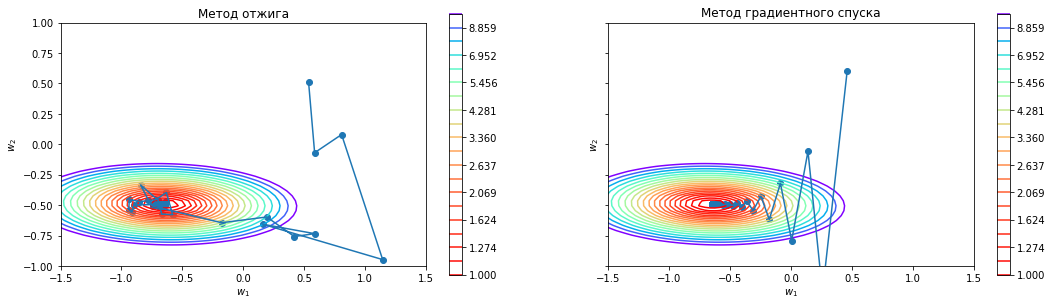

In [467]:
f, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 6))
plot_gd(model.w_fit, X_train, y_train, loss, ax[0])
plot_gd(w_list, X_train, y_train, loss, ax[1]) 
ax[0].set_xlim([-1.5, 1.5])
ax[0].set_ylim([-1, 1])
ax[0].set_title("Метод отжига")
ax[1].set_title("Метод градиентного спуска");

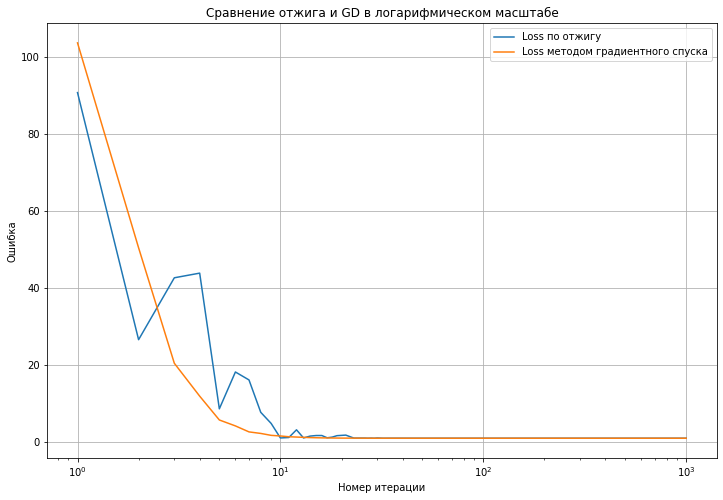

In [462]:
loss_an = []
loss_gd = []
for i in range(iter):
    loss_an.append(loss.calc_loss(X, y, model.w_fit[i]))
    loss_gd.append(loss.calc_loss(X, y, w_list[i]))

x = np.arange(1, iter+1)

plt.subplots(figsize=(12, 8))
plt.plot(x, loss_an, label="Loss по отжигу")
plt.plot(x, loss_gd,  label="Loss методом градиентного спуска")
plt.xscale("log")
plt.grid()
plt.legend()
plt.xlabel("Номер итерации")
plt.ylabel("Ошибка")
plt.title("Сравнение отжига и GD в логарифмическом масштабе")
plt.show()

Метод отжига может и способен решить задачу, но делает это очень неэффективно. Если мы не будем использовать `batch_size` и просто добавлять случайное значение к весу без выборки лучшего, мы получим случайные блуждания с затуханием. Известный факт - при случайных блужданиях модуль вектора уходит на бесконечность как $\sqrt{i}$, где $i$ - число итераций. Так что я добавил `batch_size` и выбирал то изменение весов, которое делало ошибку наименьшей. До этого все запуски алгоритма отжига без дополнения в виде `batch_size` давали вектор, который как и предсказывалось, убегал на бесконечность даже при сильной диссипации. В целом, алгоритм отжига работает хуже и оставляет после себя плохие впечатления, в том числе и от дебага кода, в котором, как оказалось, все было хорошо. Хотя он все же сходится к решению после небольших модификаций и не полагается на расчет градиента - это может быть полезно при работе с кусочно заданными функциями (у которых почти всюду нулевая производная) или функциями с множеством особенностей или локальных минимумов. 

По траектории и лоссу видно, что отжиг периодически вел себя неадекватно. Рост вектора весов при случайных блужданиях, как было сказано выше, происходит пропорционально корню из числа итераций. Он даже хуже чем bogosort, так как с числом итераций падает вероятность решить задачу.

В защиту этого алгоритма можно сказать, что вариация отжига с `batch_size` и добавлением выбора лучшего результата на каждой итерации по сути является вариацией генетического алгоритма. Это хорошо решает задачу о N-мерном рюкзаке и т.п, но явно не очень подходит для оптимизации ))  